In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Paramètres d'affichage
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# Chargement du fichier CSV
df = pd.read_csv('ex2data1.csv', header=None)
df = df[0].str.split(",", expand=True)
df.columns = ["Exam1", "Exam2", "Admitted"]
df = df.astype(float)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam1     100 non-null    float64
 1   Exam2     100 non-null    float64
 2   Admitted  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [3]:
# Dimensions et structure des données
print("Dimensions :", df.shape)
print("Colonnes :", df.columns.tolist())

Dimensions : (100, 3)
Colonnes : ['Exam1', 'Exam2', 'Admitted']


In [4]:
# Types de données et valeurs manquantes
print(df.info())
print("\nValeurs manquantes :\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam1     100 non-null    float64
 1   Exam2     100 non-null    float64
 2   Admitted  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB
None

Valeurs manquantes :
 Exam1       0
Exam2       0
Admitted    0
dtype: int64


In [5]:
# Statistiques descriptives
df.describe()

,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


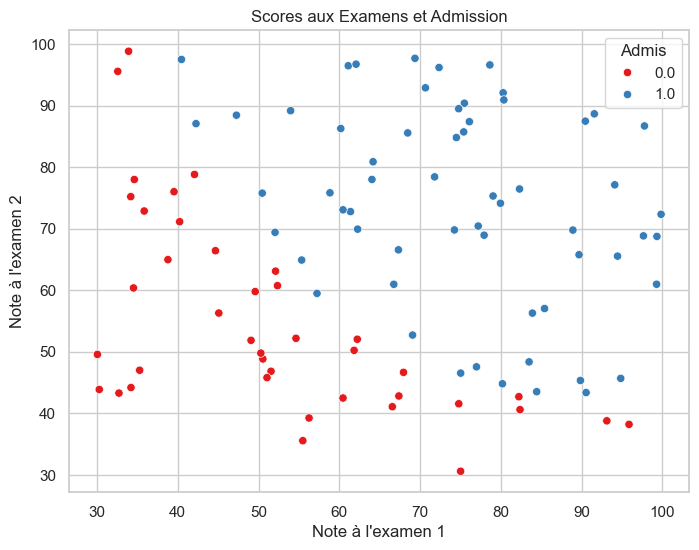

In [6]:
# Nuage de points : scores des examens vs admission
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Exam1', y='Exam2', hue='Admitted', palette='Set1')
plt.title('Scores aux Examens et Admission')
plt.xlabel('Note à l\'examen 1')
plt.ylabel('Note à l\'examen 2')
plt.legend(title='Admis')
plt.show()

Le graphique présente la répartition des étudiants admis (bleu) et non admis (rouge) en fonction de leurs scores à deux examens. On observe une tendance claire : les étudiants ayant de bonnes notes aux deux examens sont majoritairement admis. À l’inverse, ceux ayant des scores faibles sont souvent non admis. Cela suggère une corrélation positive entre les résultats académiques et la probabilité d’admission.

Cependant, il n’existe pas de seuil fixe sur un seul examen. Certains étudiants avec une note faible à un examen peuvent tout de même être admis s’ils compensent avec un très bon score à l’autre. Cela montre que les deux examens ont un rôle complémentaire dans la décision.

Une zone intermédiaire, entre 50 et 70 sur les deux axes, montre un chevauchement entre les admis et non-admis. Cela indique une incertitude dans la décision et justifie l’usage d’un modèle statistique pour estimer la probabilité d’admission.

En résumé, l’admission dépend de la combinaison des deux notes. La régression logistique est un modèle adapté ici, mais des modèles plus complexes pourraient mieux capturer les cas limites. Pour une évaluation plus fine, d'autres facteurs que les notes pourraient être intégrés dans l’analyse.

In [7]:
# Séparation des variables explicatives et de la cible
X = df[['Exam1', 'Exam2']]
y = df['Admitted']

# Création et entraînement du modèle
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [8]:
# Prédictions sur l'ensemble du jeu de données
y_pred = model.predict(X)
print("Valeurs réelles :", y.values[:10])
print("Valeurs prédites :", y_pred[:10])

Valeurs réelles : [0. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
Valeurs prédites : [0. 0. 0. 1. 1. 0. 1. 0. 1. 1.]


In [9]:
# Calcul de l'accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy du modèle : {accuracy*100:.2f}%")

Accuracy du modèle : 89.00%


In [10]:
# Coefficients appris
coeffs = model.coef_[0]
print(f"Coefficient pour Exam1 : {coeffs[0]:.4f}")
print(f"Coefficient pour Exam2 : {coeffs[1]:.4f}")

Coefficient pour Exam1 : 0.2054
Coefficient pour Exam2 : 0.2006


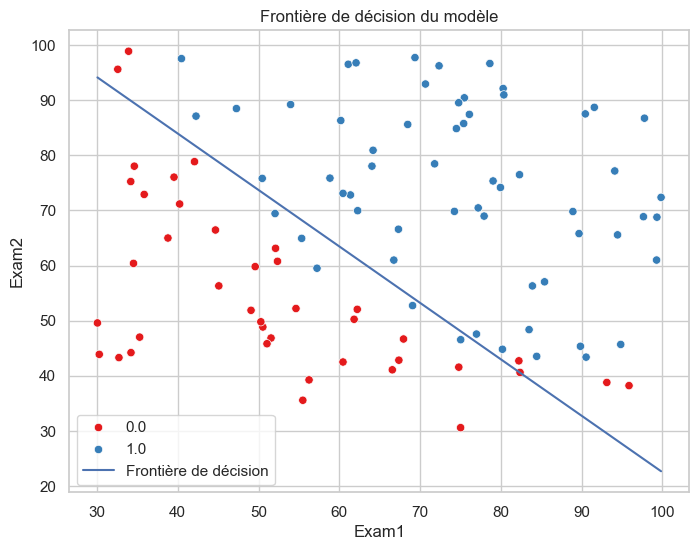

In [11]:
# Visualisation de la frontière de décision
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Exam1', y='Exam2', hue='Admitted', palette='Set1')

# Calcul de la frontière
x_values = np.linspace(df['Exam1'].min(), df['Exam1'].max(), 100)
y_values = -(model.intercept_[0] + model.coef_[0][0]*x_values) / model.coef_[0][1]
plt.plot(x_values, y_values, label='Frontière de décision')

plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Frontière de décision du modèle')
plt.legend()
plt.show()

Ce graphique montre comment un modèle de régression logistique sépare les étudiants admis (en bleu) de ceux non admis (en rouge) selon leurs notes à deux examens. La ligne représente la frontière de décision du modèle : les étudiants au-dessus sont prédits comme admis, ceux en dessous comme non admis. On voit que le modèle fonctionne plutôt bien, mais il se trompe parfois (par exemple, des points rouges au-dessus de la ligne). Cela montre qu’un modèle basé uniquement sur deux notes ne suffit pas toujours, mais il reste un bon début pour comprendre comment les décisions peuvent être automatisées.